# Mohs Hardness Prediction

### Loading Data

In [97]:
import pandas as pd

In [98]:
data = pd.read_csv('train.csv')
data.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


### Exploratory Data Analysis

In [99]:
import matplotlib.pyplot as plt

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10407 non-null  int64  
 1   allelectrons_Total     10407 non-null  float64
 2   density_Total          10407 non-null  float64
 3   allelectrons_Average   10407 non-null  float64
 4   val_e_Average          10407 non-null  float64
 5   atomicweight_Average   10407 non-null  float64
 6   ionenergy_Average      10407 non-null  float64
 7   el_neg_chi_Average     10407 non-null  float64
 8   R_vdw_element_Average  10407 non-null  float64
 9   R_cov_element_Average  10407 non-null  float64
 10  zaratio_Average        10407 non-null  float64
 11  density_Average        10407 non-null  float64
 12  Hardness               10407 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.0 MB


In [101]:
data.describe()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
count,10407.00000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000,10407.000000
mean,5203.00000,128.053516,14.491342,17.033222,4.546789,37.507703,10.938308,2.607662,1.731330,0.944132,0.493349,2.132984,4.647126
std,3004.38646,224.123776,15.972877,10.468734,0.690864,26.012313,1.408276,0.334906,0.192481,0.180017,0.063080,1.936656,1.680525
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2601.50000,68.000000,7.558488,10.000000,4.000000,20.298893,10.590660,2.530000,1.672500,0.864000,0.476196,0.814800,3.000000
50%,5203.00000,100.000000,10.650000,12.600000,4.714286,26.203827,11.202760,2.706000,1.732727,0.915556,0.488550,1.351550,5.500000
75%,7804.50000,131.000000,16.676996,22.000000,4.800000,48.719500,11.670725,2.805000,1.800000,0.981667,0.496070,2.741550,6.000000
max,10406.00000,15300.000000,643.093804,67.000000,6.000000,167.400000,15.245810,3.443000,2.250000,1.615840,0.825990,10.970000,10.000000


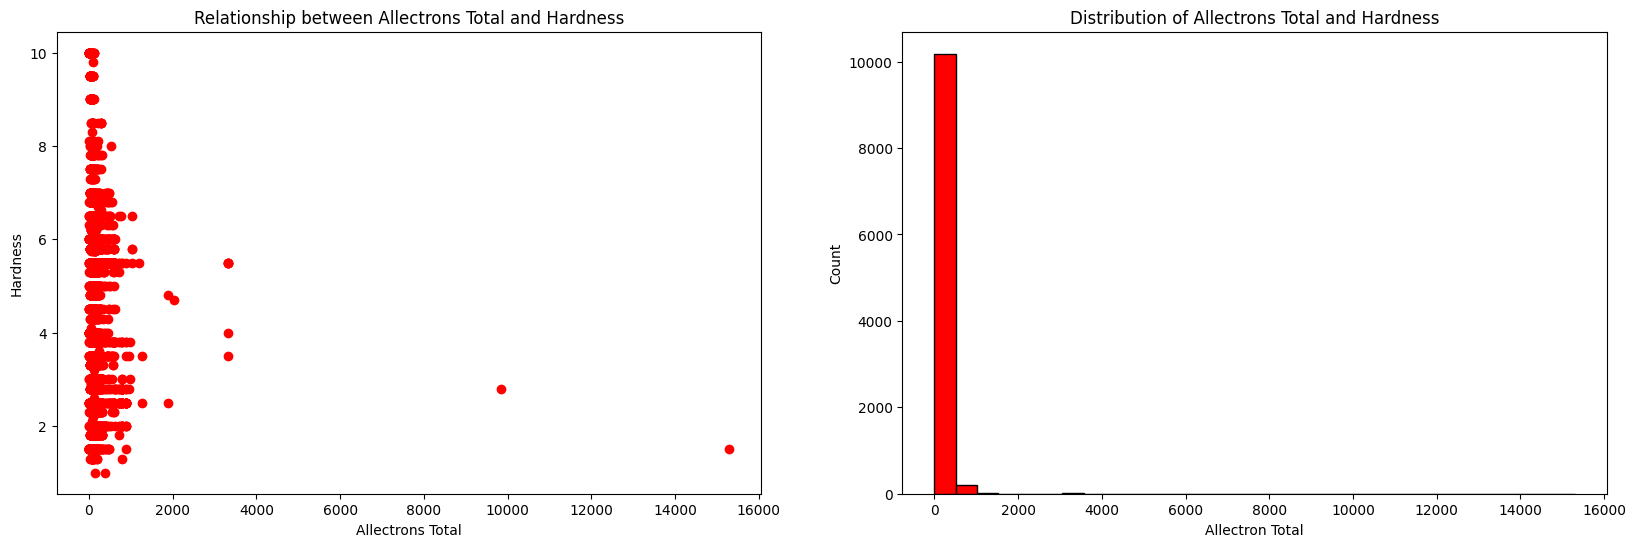

In [102]:
fig = plt.figure(figsize=(20,6))
ax = fig.subplots(1, 2)

ax[0].scatter(x=data['allelectrons_Total'], y=data['Hardness'], color='red')
ax[0].set_title('Relationship between Allectrons Total and Hardness')
ax[0].set_xlabel('Allectrons Total')
ax[0].set_ylabel('Hardness')

ax[1].hist(x=data['allelectrons_Total'], color='red', bins=30, lw=1, ec='black')
ax[1].set_title('Distribution of Allectrons Total and Hardness')
ax[1].set_xlabel('Allectron Total')
ax[1].set_ylabel('Count')

plt.show()

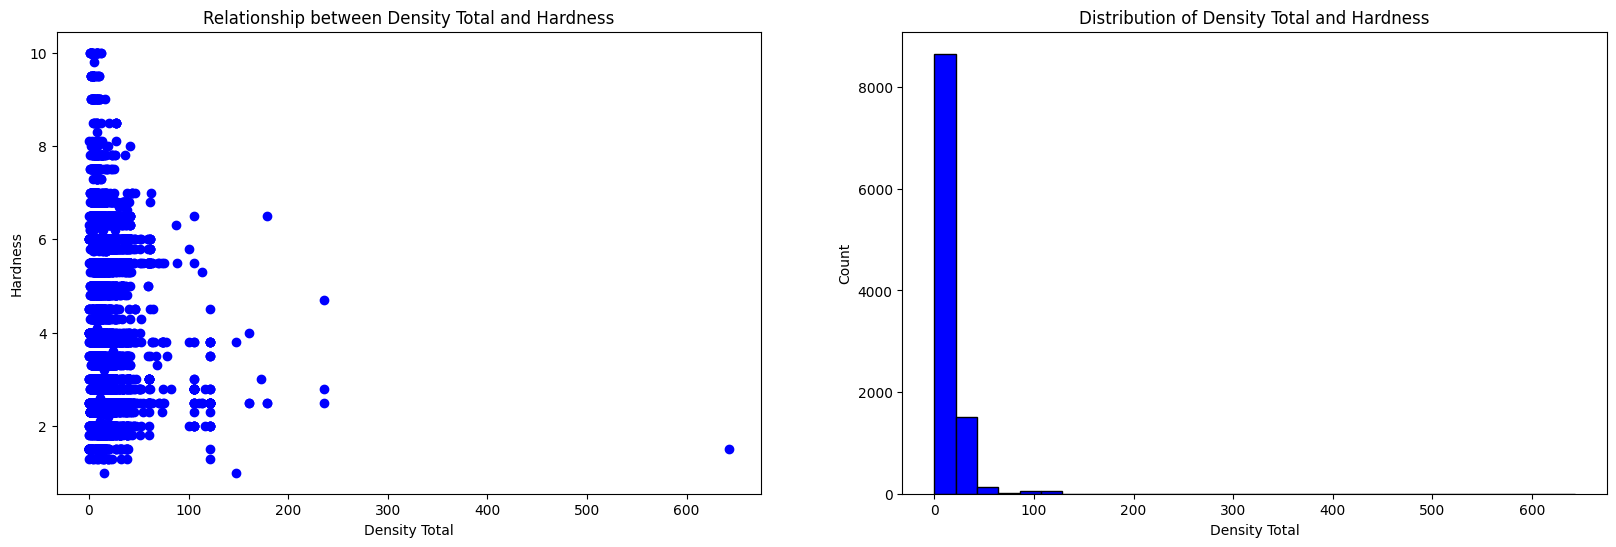

In [103]:
fig = plt.figure(figsize=(20,6))
ax = fig.subplots(1, 2)

ax[0].scatter(x=data['density_Total'], y=data['Hardness'], color='b')
ax[0].set_title('Relationship between Density Total and Hardness')
ax[0].set_xlabel('Density Total')
ax[0].set_ylabel('Hardness')

ax[1].hist(x=data['density_Total'], color='b', bins=30, lw=1, ec='black')
ax[1].set_title('Distribution of Density Total and Hardness')
ax[1].set_xlabel('Density Total')
ax[1].set_ylabel('Count')

plt.show()

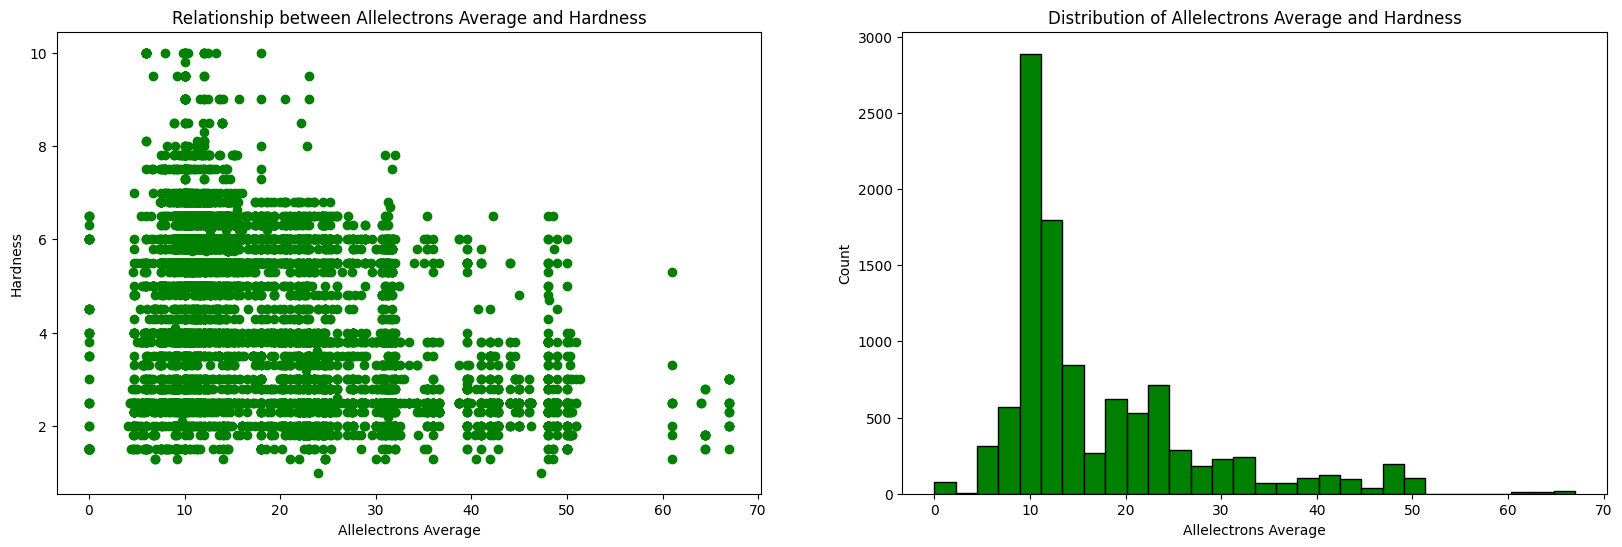

In [104]:
fig = plt.figure(figsize=(20,6))
ax = fig.subplots(1, 2)

ax[0].scatter(x=data['allelectrons_Average'], y=data['Hardness'], color='g')
ax[0].set_title('Relationship between Allelectrons Average and Hardness')
ax[0].set_xlabel('Allelectrons Average')
ax[0].set_ylabel('Hardness')

ax[1].hist(x=data['allelectrons_Average'], color='g', bins=30, lw=1, ec='black')
ax[1].set_title('Distribution of Allelectrons Average and Hardness')
ax[1].set_xlabel('Allelectrons Average')
ax[1].set_ylabel('Count')

plt.show()

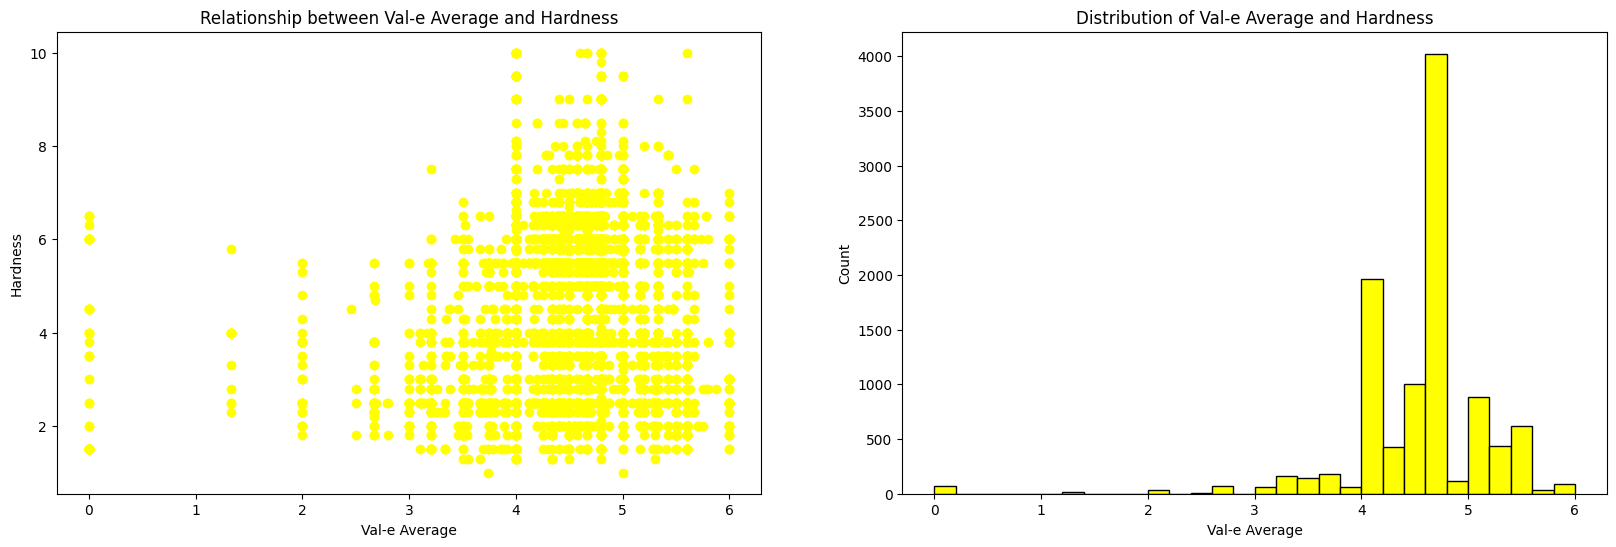

In [105]:
fig = plt.figure(figsize=(20,6))
ax = fig.subplots(1, 2)

ax[0].scatter(x=data['val_e_Average'], y=data['Hardness'], color='yellow')
ax[0].set_title('Relationship between Val-e Average and Hardness')
ax[0].set_xlabel('Val-e Average')
ax[0].set_ylabel('Hardness')

ax[1].hist(x=data['val_e_Average'], color='yellow', bins=30, lw=1, ec='black')
ax[1].set_title('Distribution of Val-e Average and Hardness')
ax[1].set_xlabel('Val-e Average')
ax[1].set_ylabel('Count')

plt.show()

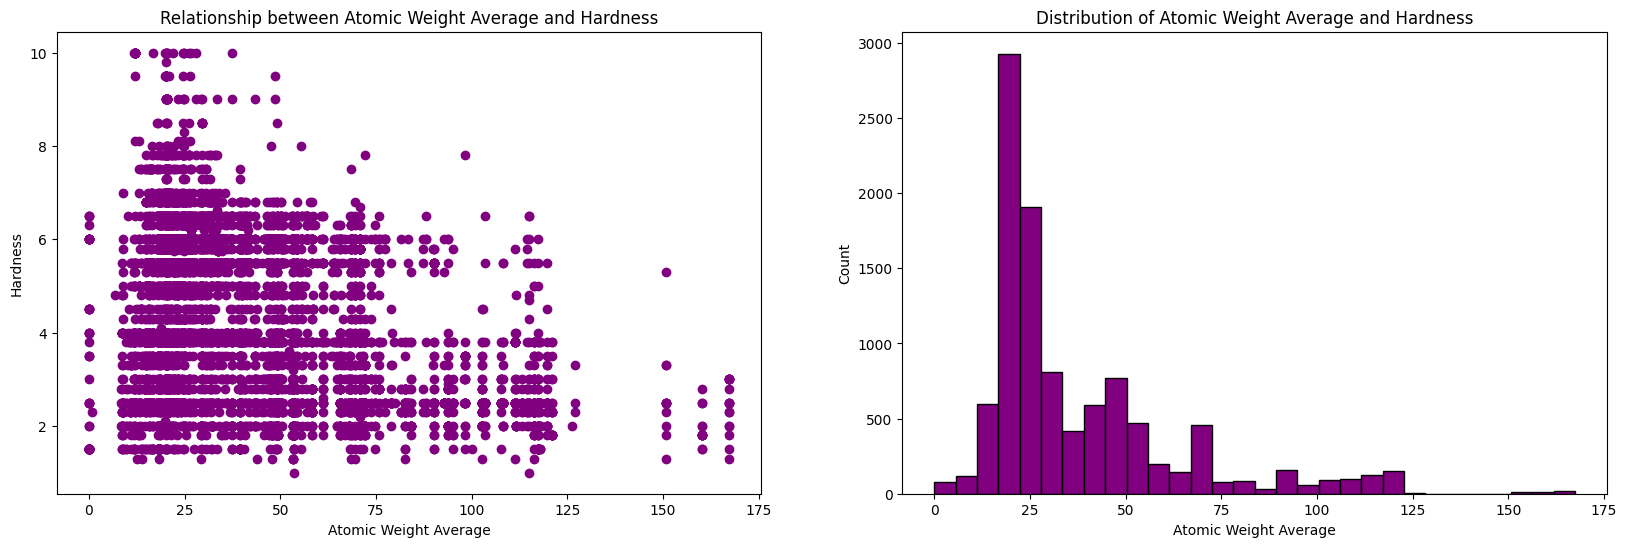

In [106]:
fig = plt.figure(figsize=(20,6))
ax = fig.subplots(1, 2)

ax[0].scatter(x=data['atomicweight_Average'], y=data['Hardness'], color='purple')
ax[0].set_title('Relationship between Atomic Weight Average and Hardness')
ax[0].set_xlabel('Atomic Weight Average')
ax[0].set_ylabel('Hardness')

ax[1].hist(x=data['atomicweight_Average'], color='purple', bins=30, lw=1, ec='black')
ax[1].set_title('Distribution of Atomic Weight Average and Hardness')
ax[1].set_xlabel('Atomic Weight Average')
ax[1].set_ylabel('Count')

plt.show()

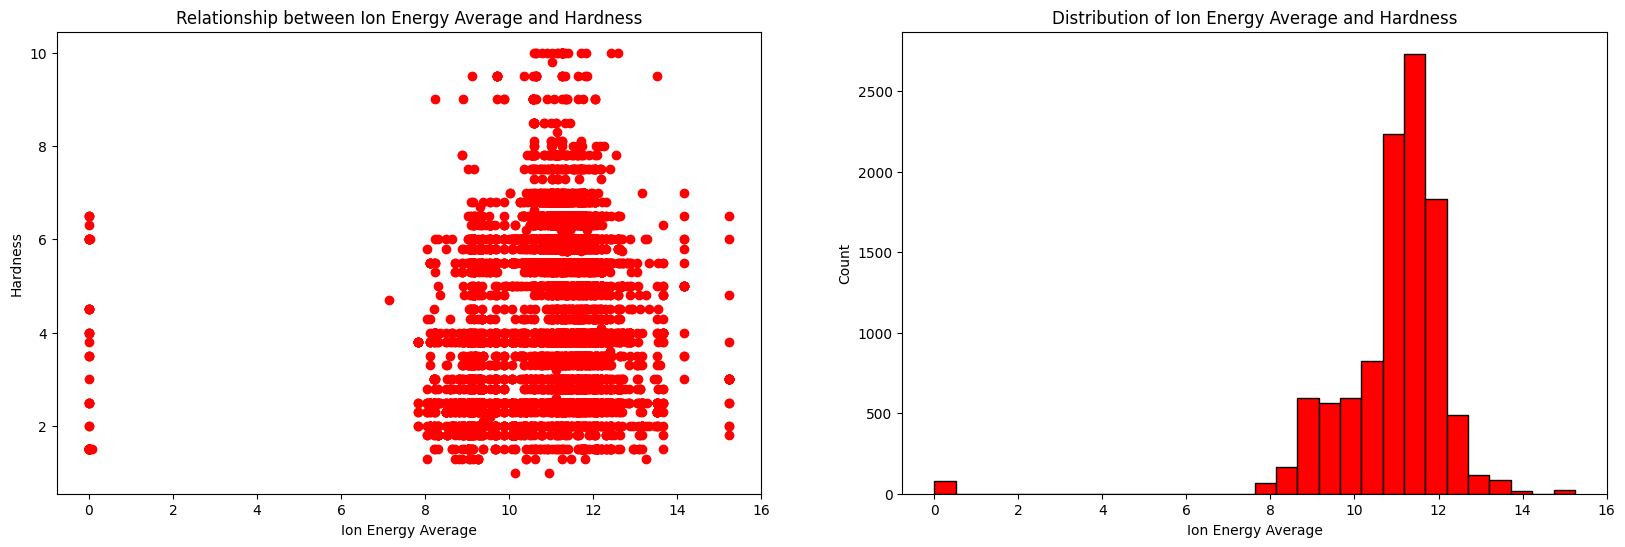

In [107]:
fig = plt.figure(figsize=(20,6))
ax = fig.subplots(1, 2)

ax[0].scatter(x=data['ionenergy_Average'], y=data['Hardness'], color='red')
ax[0].set_title('Relationship between Ion Energy Average and Hardness')
ax[0].set_xlabel('Ion Energy Average')
ax[0].set_ylabel('Hardness')

ax[1].hist(x=data['ionenergy_Average'], color='red', bins=30, lw=1, ec='black')
ax[1].set_title('Distribution of Ion Energy Average and Hardness')
ax[1].set_xlabel('Ion Energy Average')
ax[1].set_ylabel('Count')

plt.show()

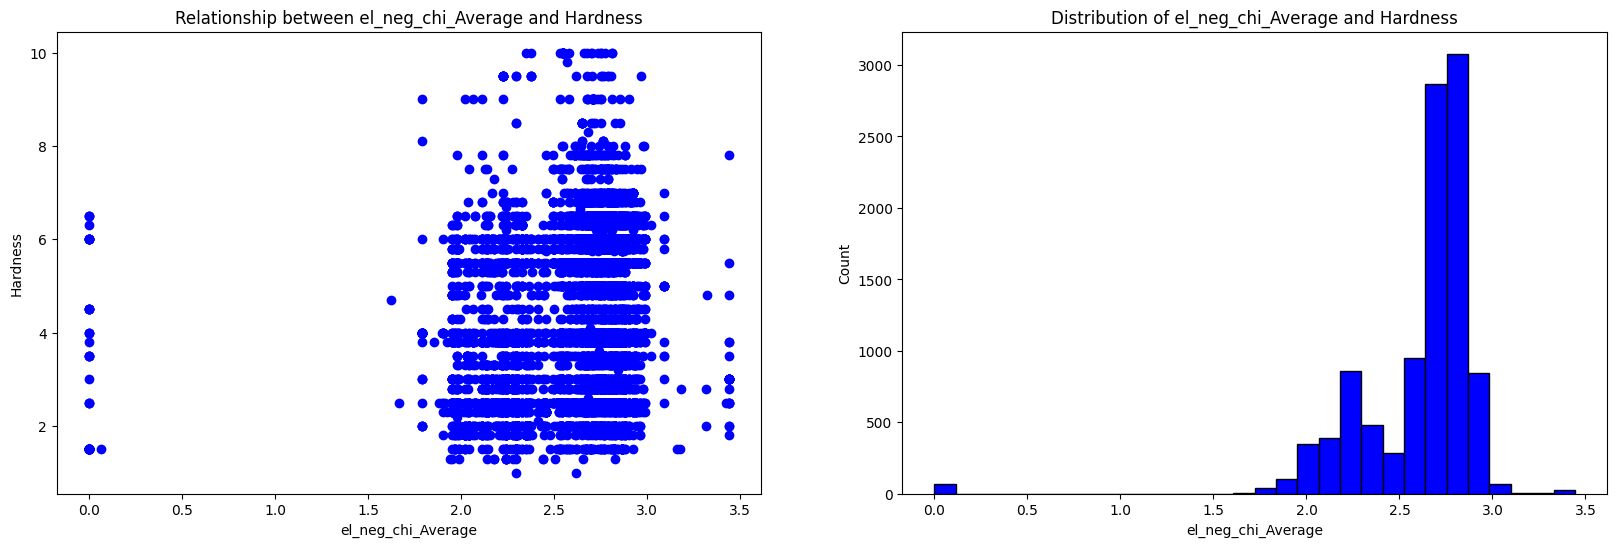

In [108]:
fig = plt.figure(figsize=(20,6))
ax = fig.subplots(1, 2)

ax[0].scatter(x=data['el_neg_chi_Average'], y=data['Hardness'], color='blue')
ax[0].set_title('Relationship between el_neg_chi_Average and Hardness')
ax[0].set_xlabel('el_neg_chi_Average')
ax[0].set_ylabel('Hardness')

ax[1].hist(x=data['el_neg_chi_Average'], color='blue', bins=30, lw=1, ec='black')
ax[1].set_title('Distribution of el_neg_chi_Average and Hardness')
ax[1].set_xlabel('el_neg_chi_Average')
ax[1].set_ylabel('Count')

plt.show()

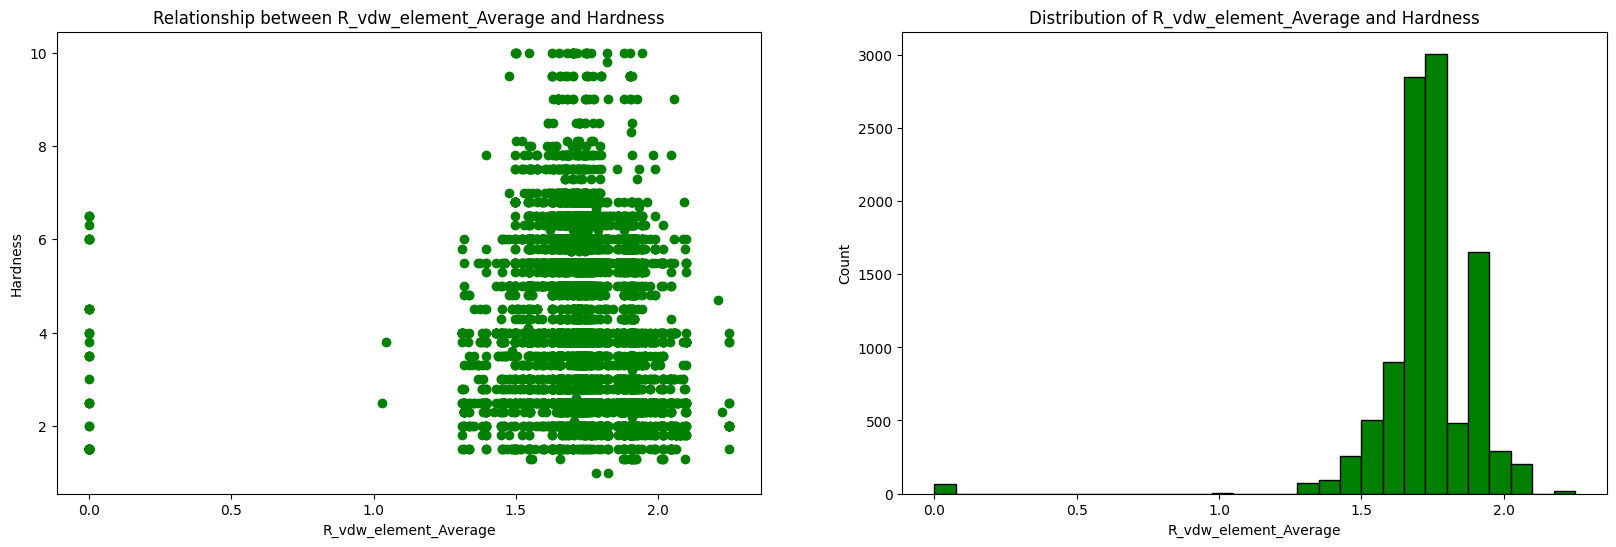

In [109]:
fig = plt.figure(figsize=(20,6))
ax = fig.subplots(1, 2)

ax[0].scatter(x=data['R_vdw_element_Average'], y=data['Hardness'], color='green')
ax[0].set_title('Relationship between R_vdw_element_Average and Hardness')
ax[0].set_xlabel('R_vdw_element_Average')
ax[0].set_ylabel('Hardness')

ax[1].hist(x=data['R_vdw_element_Average'], color='green', bins=30, lw=1, ec='black')
ax[1].set_title('Distribution of R_vdw_element_Average and Hardness')
ax[1].set_xlabel('R_vdw_element_Average')
ax[1].set_ylabel('Count')

plt.show()

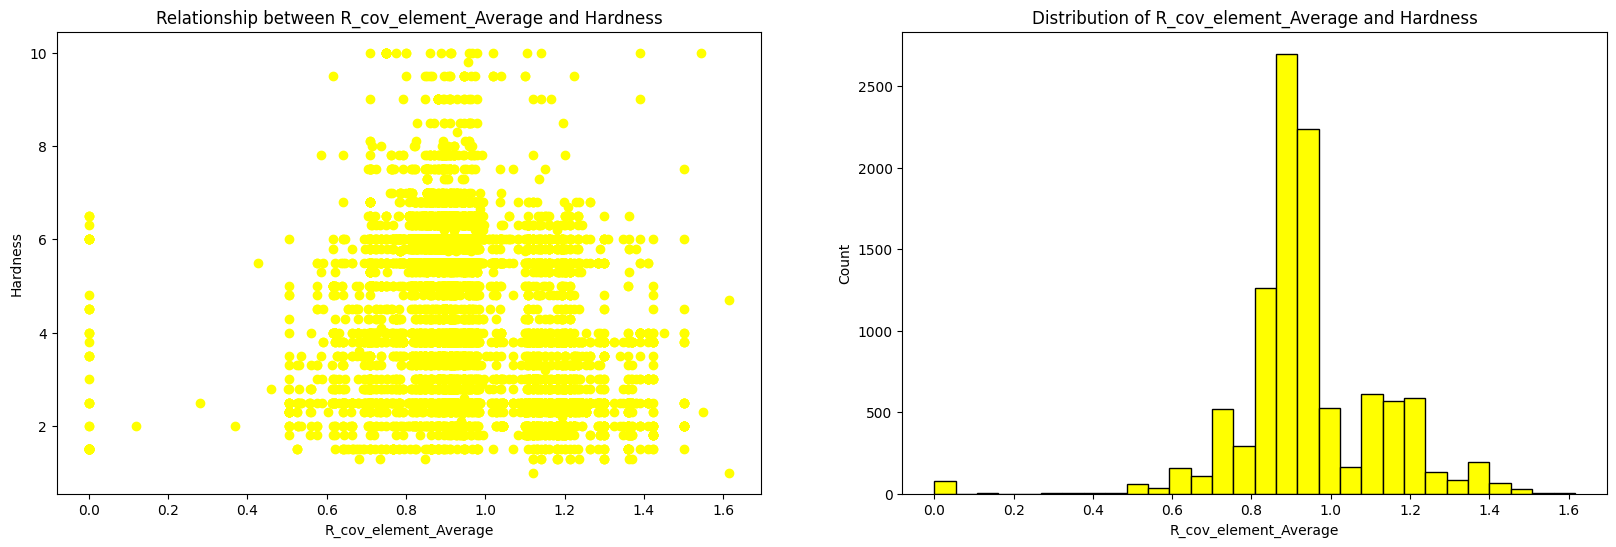

In [110]:
fig = plt.figure(figsize=(20,6))
ax = fig.subplots(1, 2)

ax[0].scatter(x=data['R_cov_element_Average'], y=data['Hardness'], color='yellow')
ax[0].set_title('Relationship between R_cov_element_Average and Hardness')
ax[0].set_xlabel('R_cov_element_Average')
ax[0].set_ylabel('Hardness')

ax[1].hist(x=data['R_cov_element_Average'], color='yellow', bins=30, lw=1, ec='black')
ax[1].set_title('Distribution of R_cov_element_Average and Hardness')
ax[1].set_xlabel('R_cov_element_Average')
ax[1].set_ylabel('Count')

plt.show()

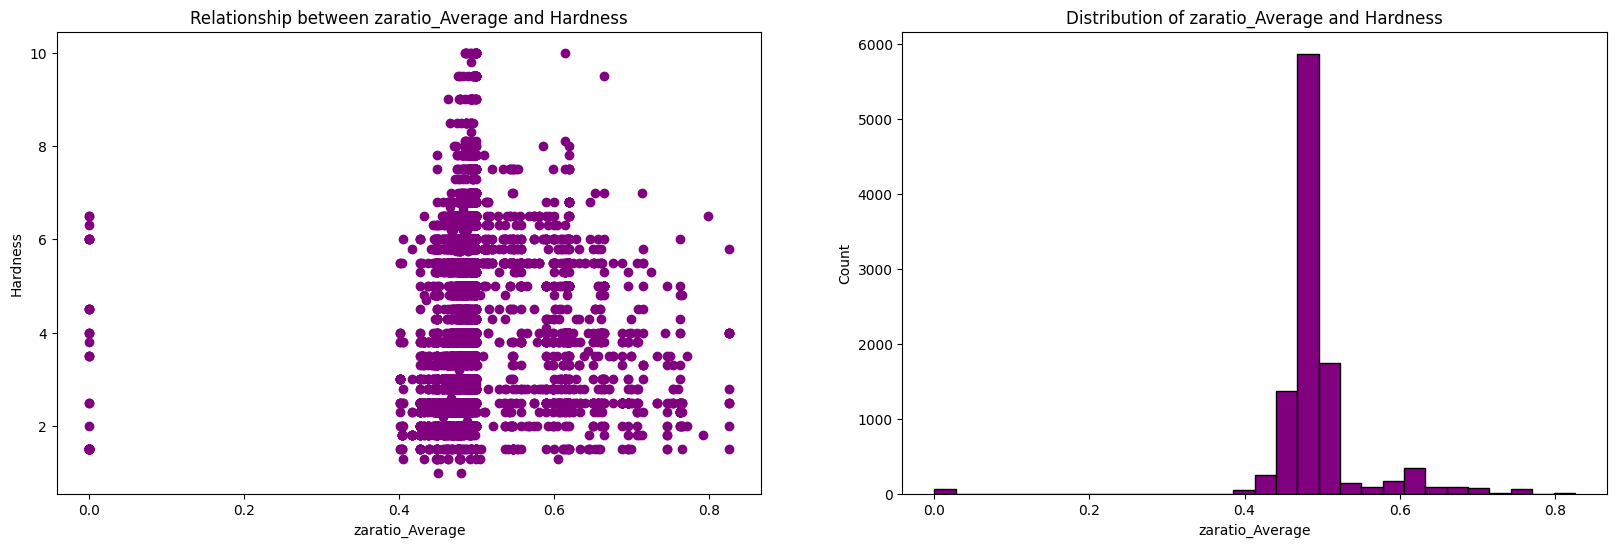

In [111]:
fig = plt.figure(figsize=(20,6))
ax = fig.subplots(1, 2)

ax[0].scatter(x=data['zaratio_Average'], y=data['Hardness'], color='purple')
ax[0].set_title('Relationship between zaratio_Average and Hardness')
ax[0].set_xlabel('zaratio_Average')
ax[0].set_ylabel('Hardness')

ax[1].hist(x=data['zaratio_Average'], color='purple', bins=30, lw=1, ec='black')
ax[1].set_title('Distribution of zaratio_Average and Hardness')
ax[1].set_xlabel('zaratio_Average')
ax[1].set_ylabel('Count')

plt.show()

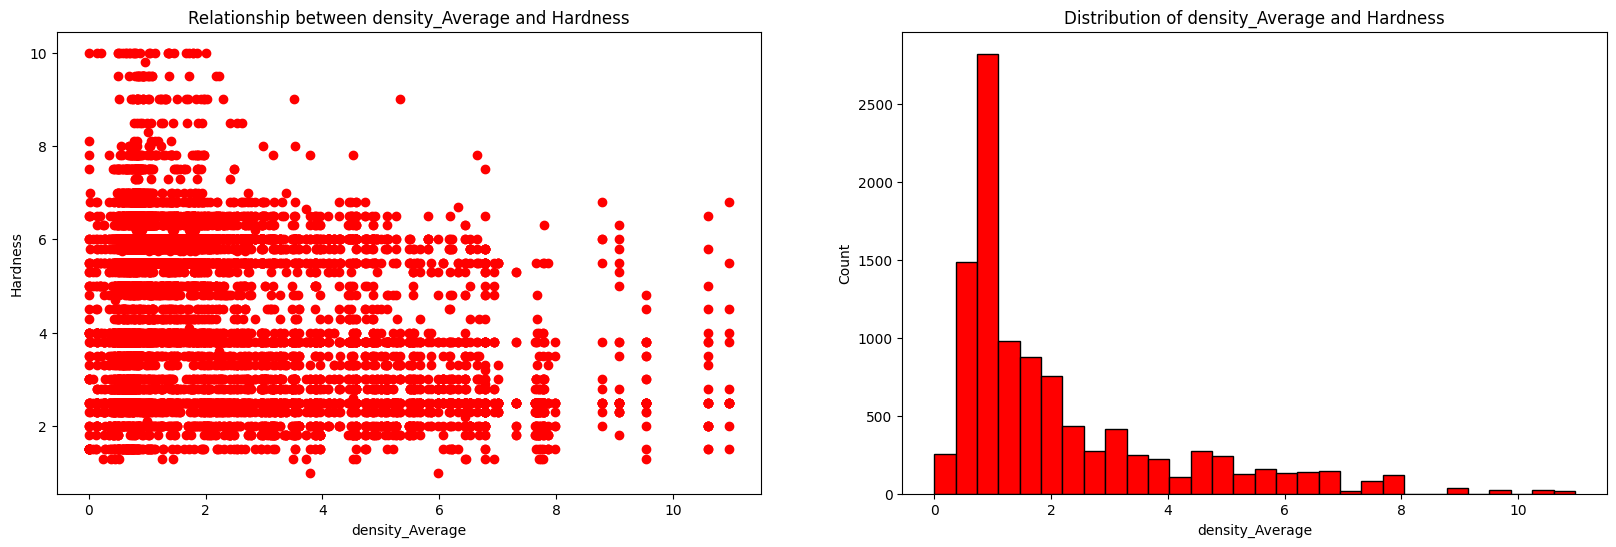

In [112]:
fig = plt.figure(figsize=(20,6))
ax = fig.subplots(1, 2)

ax[0].scatter(x=data['density_Average'], y=data['Hardness'], color='red')
ax[0].set_title('Relationship between density_Average and Hardness')
ax[0].set_xlabel('density_Average')
ax[0].set_ylabel('Hardness')

ax[1].hist(x=data['density_Average'], color='red', bins=30, lw=1, ec='black')
ax[1].set_title('Distribution of density_Average and Hardness')
ax[1].set_xlabel('density_Average')
ax[1].set_ylabel('Count')

plt.show()

#### Correlation Analysis

In [113]:
import seaborn as sns

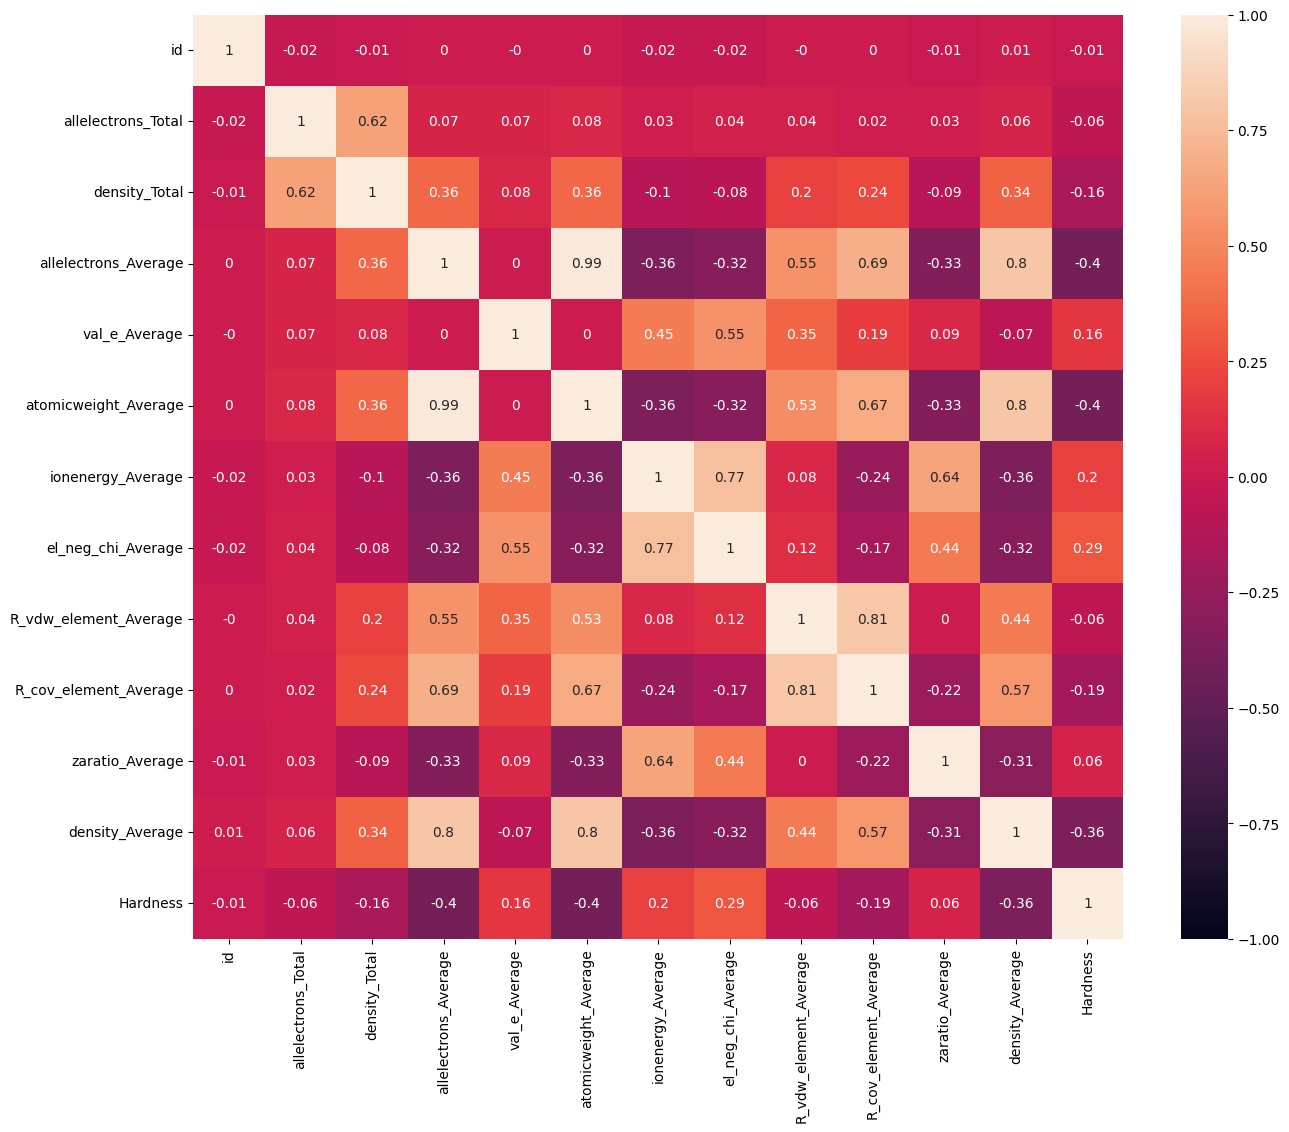

In [114]:
corr = data.corr()
corr = round(corr, 2)
figure = plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True, vmax=1, vmin=-1)
plt.show()

### Splitting the Data

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
X = data.drop(['id', 'Hardness'], axis=1)
y = data['Hardness']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

### Linear Regression, Lasso Regression and Ridge Regression Approaches

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

##### Evaluating Linear Regression Approach

In [119]:
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error

In [120]:
LR = LinearRegression()
LR.fit(X_train, y_train)

lr_pred = LR.predict(X_test)
lr_med_abs_error = median_absolute_error(y_test, lr_pred)
print(f'Median Absolute Error: {lr_med_abs_error:.3f}')

Median Absolute Error: 0.975


##### Evaluating Lasso Regression Approach

###### Finding Best Hyperparameters

In [121]:
from sklearn.model_selection import GridSearchCV

In [122]:
lasso_params = {
    'alpha' : [0.001, 0.01, 0.1, 0.5, 1],
    'selection' : ['cyclic', 'random']
}

lasso_grid = GridSearchCV(Lasso(), param_grid=lasso_params)
lasso_grid.fit(X_train, y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1],
                         'selection': ['cyclic', 'random']})

In [123]:
print(f'Lasso Best Params : {lasso_grid.best_params_}')
print(f'Best Score : {lasso_grid.best_score_}')

Lasso Best Params : {'alpha': 0.001, 'selection': 'random'}
Best Score : 0.24513322616620042


In [124]:
LASS = Lasso(alpha=0.001, selection='random')
LASS.fit(X_train, y_train)

Lasso(alpha=0.001, selection='random')

In [125]:
lass_pred = LASS.predict(X_test)

lass_med_abs_error = median_absolute_error(y_true=y_test, y_pred=lass_pred)
print(f'Lasso Model Median Absolute Error : {lass_med_abs_error:.3f}')

Lasso Model Median Absolute Error : 0.974


##### Evaluating Ridge Regression Approach

###### Finding Best Hyperparameters

In [126]:
ridge_params = {
    'alpha' : [0.001, 0.01, 0.1, 0.5, 1],
    'max_iter' : [1000, 2000, 5000, 10000]
}

ridge_grid = GridSearchCV(Ridge(), param_grid=ridge_params)

ridge_grid.fit(X_train, y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1],
                         'max_iter': [1000, 2000, 5000, 10000]})

In [127]:
print(f'Best Params for Ridge : {ridge_grid.best_params_}')
print(f'Best Score : {ridge_grid.best_score_}')

Best Params for Ridge : {'alpha': 0.1, 'max_iter': 1000}
Best Score : 0.24530714084313782


In [128]:
RG = Ridge(alpha=0.1, max_iter=1000)
RG.fit(X_train, y_train)

Ridge(alpha=0.1, max_iter=1000)

In [129]:
rg_pred = RG.predict(X_test)

rg_med_abs_error = median_absolute_error(y_test, rg_pred)
print(f'Ridge Regressor Median Absolute Error : {rg_med_abs_error:.3f}')

Ridge Regressor Median Absolute Error : 0.975


### Random Forest Regressor Approach

In [130]:
from sklearn.ensemble import RandomForestRegressor

In [131]:
RFR = RandomForestRegressor(n_estimators=500, criterion='absolute_error')
RFR.fit(X_train, y_train)

RandomForestRegressor(criterion='absolute_error', n_estimators=500)

In [132]:
rfr_pred = RFR.predict(X_test)

rfr_med_absolute_error = median_absolute_error(y_test, rfr_pred)
print(f'Random Forest Regressor Mediam Absolute Error: {rfr_med_absolute_error:.3f}')

Random Forest Regressor Mediam Absolute Error: 0.683


### Voting Method

In [133]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [134]:
RFR = RandomForestRegressor(n_estimators=500, criterion='absolute_error')
RFR.fit(X_train, y_train)

GR = GradientBoostingRegressor(loss='absolute_error')
GR.fit(X_train, y_train)

GradientBoostingRegressor(loss='absolute_error')

In [137]:
VR = VotingRegressor(estimators=[('lr', LASS), ('rfr', RFR), ('gr', GR)], weights=[0.1, 0.4, 0.95]) 
VR.fit(X_train, y_train)

VotingRegressor(estimators=[('lr', Lasso(alpha=0.001, selection='random')),
                            ('rfr',
                             RandomForestRegressor(criterion='absolute_error',
                                                   n_estimators=500)),
                            ('gr',
                             GradientBoostingRegressor(loss='absolute_error'))],
                weights=[0.1, 0.4, 0.95])

In [138]:
vr_pred = VR.predict(X_test)

In [139]:
vr_median_abs_error = median_absolute_error(y_true=y_test, y_pred=vr_pred)
print(f'Voting Regressor Median Absolute Error: {vr_median_abs_error:.3f}')

Voting Regressor Median Absolute Error: 0.622


In [147]:
test = pd.read_csv('test.csv')

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,10407,884.0,121.420000,35.360000,5.280000,82.561240,9.370384,2.298000,1.907200,1.200000,0.461899,1.79459
1,10408,90.0,9.931960,18.000000,5.600000,39.568056,12.086300,2.868000,1.652000,0.864000,0.476196,1.41194
2,10409,116.0,7.767992,11.600000,4.800000,23.231818,11.023840,2.644000,1.794000,0.960000,0.499514,0.78834
3,10410,100.0,9.107996,10.000000,4.800000,20.298893,12.086300,2.828000,1.662000,0.792000,0.495796,1.20466
4,10411,55.0,4.030000,11.000000,4.000000,22.977675,11.280950,2.455000,1.750000,0.893333,0.476095,0.93456
...,...,...,...,...,...,...,...,...,...,...,...,...
6934,17341,446.0,36.135392,9.636364,4.636364,19.689448,11.045515,2.768636,1.769697,0.871818,0.498702,0.11548
6935,17342,36.0,3.550000,18.000000,4.000000,36.068500,8.236600,1.790000,2.055000,1.390000,0.499000,1.35045
6936,17343,68.0,4.545328,11.333333,5.333333,22.688853,10.938358,2.876667,1.713333,0.916667,0.499074,0.73425
6937,17344,40.0,2.334164,6.666667,4.000000,13.016128,12.700467,2.770000,1.476667,0.616667,0.663797,0.51227


In [149]:
X = test.drop(['id'], axis=1)

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,884.0,121.420000,35.360000,5.280000,82.561240,9.370384,2.298000,1.907200,1.200000,0.461899,1.79459
1,90.0,9.931960,18.000000,5.600000,39.568056,12.086300,2.868000,1.652000,0.864000,0.476196,1.41194
2,116.0,7.767992,11.600000,4.800000,23.231818,11.023840,2.644000,1.794000,0.960000,0.499514,0.78834
3,100.0,9.107996,10.000000,4.800000,20.298893,12.086300,2.828000,1.662000,0.792000,0.495796,1.20466
4,55.0,4.030000,11.000000,4.000000,22.977675,11.280950,2.455000,1.750000,0.893333,0.476095,0.93456
...,...,...,...,...,...,...,...,...,...,...,...
6934,446.0,36.135392,9.636364,4.636364,19.689448,11.045515,2.768636,1.769697,0.871818,0.498702,0.11548
6935,36.0,3.550000,18.000000,4.000000,36.068500,8.236600,1.790000,2.055000,1.390000,0.499000,1.35045
6936,68.0,4.545328,11.333333,5.333333,22.688853,10.938358,2.876667,1.713333,0.916667,0.499074,0.73425
6937,40.0,2.334164,6.666667,4.000000,13.016128,12.700467,2.770000,1.476667,0.616667,0.663797,0.51227


In [150]:
test_pred = VR.predict(X)

In [165]:
test['Hardness'] = test_pred

In [166]:
submission = test[['id', 'Hardness']]
submission.to_csv('submission.csv', index=False)